In [1]:
pip install seaborn

^C
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


## Test for Normality

- Automatically not normal since there is a categorical data type column (weathercode (wmo code))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('Yield_Weather.csv')
df = df.drop(columns=['Unnamed: 0'])

In [19]:
df.columns

Index(['Year', 'Location', 'Production (mt)', 'Area (ha)', 'Yield (mt/ha)',
       'weathercode (wmo code)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'rain (mm)',
       'surface_pressure (hPa)', 'cloudcover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'windspeed_10m (km/h)', 'winddirection_10m (°)', 'windgusts_10m (km/h)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)'],
      dtype='object')

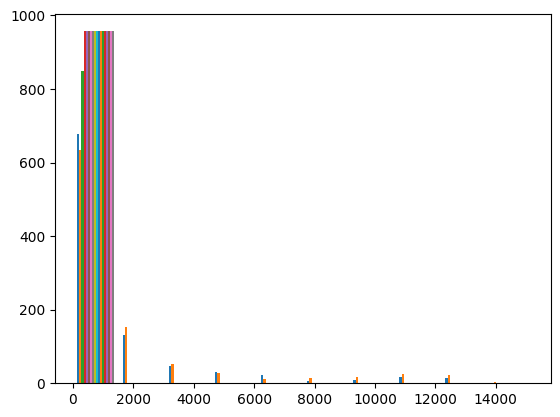

In [8]:
plt.hist(df.drop(columns=['Location', 'Year', 'weathercode (wmo code)']))
plt.show()

## Outlier Detection Using Z-score value

In [9]:
df.dtypes

Year                                   int64
Location                              object
Production (mt)                      float64
Area (ha)                            float64
Yield (mt/ha)                        float64
weathercode (wmo code)                object
temperature_2m (°C)                  float64
relativehumidity_2m (%)              float64
dewpoint_2m (°C)                     float64
rain (mm)                            float64
surface_pressure (hPa)               float64
cloudcover (%)                       float64
et0_fao_evapotranspiration (mm)      float64
vapor_pressure_deficit (kPa)         float64
windspeed_10m (km/h)                 float64
winddirection_10m (°)                float64
windgusts_10m (km/h)                 float64
soil_temperature_28_to_100cm (°C)    float64
soil_moisture_28_to_100cm (m³/m³)    float64
direct_radiation (W/m²)              float64
diffuse_radiation (W/m²)             float64
dtype: object

In [10]:
df['Yield (mt/ha)'] = df['Yield (mt/ha)'].fillna(0)

In [11]:
df.isnull().values.any()

False

In [90]:
df.describe()

,Year,Production (mt),Area (ha),Yield (mt/ha),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),surface_pressure (hPa),cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
count,957.000000,957.000000,957.000000,848.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,2006.000000,1485.842950,2009.713568,0.754517,24.991554,84.795399,22.126121,0.300396,971.342668,58.065295,0.152759,0.523013,6.676062,167.901813,18.101211,26.154387,0.379429,139.242037,72.936331
std,9.526883,2377.530043,3019.818111,0.503938,2.098423,2.768218,1.757050,0.110517,41.075035,9.047516,0.011922,0.132792,3.836158,25.848587,3.452405,1.969559,0.084169,15.174769,3.369203
min,1990.000000,0.000000,0.000000,0.000000,19.513037,76.442646,16.883071,0.079349,875.282320,32.043830,0.125298,0.240229,2.694820,102.151370,11.438721,20.910622,0.089491,102.877854,62.795988
25%,1998.000000,24.470000,80.000000,0.418086,23.408071,82.597603,20.821004,0.216883,940.075808,52.296804,0.144041,0.425146,4.373390,147.480305,16.027641,24.714754,0.358457,128.430442,70.765411
50%,2006.000000,320.340000,802.000000,0.716335,25.546221,84.784153,22.763559,0.290822,984.133733,57.572746,0.151785,0.536473,5.370148,167.572831,17.547374,26.615468,0.400144,138.774087,72.816438
75%,2014.000000,1780.810000,2650.000000,0.995773,26.629178,86.853425,23.504760,0.371826,1008.225422,63.645890,0.160162,0.614129,7.670365,185.453324,19.259085,27.446884,0.431587,147.594863,75.388014
max,2022.000000,9634.034038,11509.982575,2.320705,28.487750,91.361530,25.526416,0.640265,1010.695091,81.984817,0.188529,0.925965,18.266862,240.453995,28.528230,31.171849,0.481368,184.836627,81.203539


### Production (mt)

In [20]:
df['Production (mt)'].describe()

count      957.000000
mean      1569.145266
std       2688.296257
min          0.000000
25%         24.470000
50%        320.340000
75%       1780.810000
max      14373.880000
Name: Production (mt), dtype: float64

In [21]:
mean = np.mean(df['Production (mt)'])
std = np.std(df['Production (mt)'])
 
threshold = 3
outliers = []
for x in df['Production (mt)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  1569.1452664576802

Standard deviation:  2686.891346634448

Outliers  :  [11117.13, 13159.67, 14373.88, 13462.18, 13056.48, 11386.97, 10703.48, 10597.11, 9990.29, 10078.15, 10121.33, 10026.37, 11718.27, 11999.41, 11997.91, 11850.15, 12723.66, 12888.9, 12570.29, 12085.42, 11796.03, 10031.99, 10706.38, 11113.98, 11660.93, 11907.61, 12213.84, 12462.98, 12199.23, 12506.3, 13224.63, 12709.82, 12207.25, 11984.85, 10875.79, 10006.93, 10785.45, 11512.57]


In [22]:
upper_limit = df['Production (mt)'].mean() + 3*df['Production (mt)'].std()
lower_limit = df['Production (mt)'].mean() - 3*df['Production (mt)'].std()

df['Production (mt)'] = np.where(
    df['Production (mt)']>upper_limit,
    upper_limit,
    np.where(
        df['Production (mt)']<lower_limit,
        lower_limit,
        df['Production (mt)']
    )
)

In [23]:
df['Production (mt)'].describe()

count     957.000000
mean     1485.842950
std      2377.530043
min         0.000000
25%        24.470000
50%       320.340000
75%      1780.810000
max      9634.034038
Name: Production (mt), dtype: float64

### Area (ha)

In [24]:
df['Area (ha)'].describe()

count      957.000000
mean      2049.406959
std       3153.525205
min          0.000000
25%         80.000000
50%        802.000000
75%       2650.000000
max      15227.000000
Name: Area (ha), dtype: float64

In [25]:
mean = np.mean(df['Area (ha)'])
std = np.std(df['Area (ha)'])
 
threshold = 3
outliers = []
for x in df['Area (ha)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  2049.406959247649

Standard deviation:  3151.877164765096

Outliers  :  [12752.0, 12752.0, 12720.0, 12715.0, 12135.0, 11867.0, 11650.0, 11660.0, 11660.0, 11543.0, 11513.0, 12280.0, 12284.0, 12288.0, 12303.0, 12312.0, 12349.0, 12344.0, 12484.0, 12484.0, 12360.0, 12360.0, 12375.0, 12375.0, 13025.0, 13225.0, 13300.0, 13300.0, 13370.0, 13370.0, 14707.0, 14727.0, 15227.0]


In [26]:
upper_limit = df['Area (ha)'].mean() + 3*df['Area (ha)'].std()
lower_limit = df['Area (ha)'].mean() - 3*df['Area (ha)'].std()

df['Area (ha)'] = np.where(
    df['Area (ha)']>upper_limit,
    upper_limit,
    np.where(
        df['Area (ha)']<lower_limit,
        lower_limit,
        df['Area (ha)']
    )
)

In [27]:
df['Area (ha)'].describe()

count      957.000000
mean      2009.713568
std       3019.818111
min          0.000000
25%         80.000000
50%        802.000000
75%       2650.000000
max      11509.982575
Name: Area (ha), dtype: float64

### Yield (mt/ha)

In [28]:
df['Yield (mt/ha)'].describe()

count    848.000000
mean       0.759493
std        0.520404
min        0.000000
25%        0.418086
50%        0.716335
75%        0.995773
max        3.033851
Name: Yield (mt/ha), dtype: float64

In [29]:
mean = np.mean(df['Yield (mt/ha)'])
std = np.std(df['Yield (mt/ha)'])
 
threshold = 3
outliers = []
for x in df['Yield (mt/ha)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.7594927604877921

Standard deviation:  0.5200971864496304

Outliers  :  [3.033851185609158, 2.6106721698113207, 2.5989411764705883, 2.460055555555556, 2.511278439869989, 2.410487012987013, 2.4969852216748767, 2.416433497536945, 2.338139079333986, 2.4014103819784527, 2.408364348677767, 2.414779627815866, 2.496699314397649, 2.5269565217391303, 2.417729468599034, 2.4679710144927536, 2.568461538461538, 2.4684134615384616, 2.482941176470588, 2.40209756097561, 2.432436647173489, 2.389044834307992, 2.4140388349514565, 2.4462585034013604, 2.4337342386032974, 2.411309408341416, 2.418846899224806]


In [30]:
upper_limit = df['Yield (mt/ha)'].mean() + 3*df['Yield (mt/ha)'].std()
lower_limit = df['Yield (mt/ha)'].mean() - 3*df['Yield (mt/ha)'].std()

df['Yield (mt/ha)'] = np.where(
    df['Yield (mt/ha)']>upper_limit,
    upper_limit,
    np.where(
        df['Yield (mt/ha)']<lower_limit,
        lower_limit,
        df['Yield (mt/ha)']
    )
)

In [31]:
df['Yield (mt/ha)'].describe()

count    848.000000
mean       0.754517
std        0.503938
min        0.000000
25%        0.418086
50%        0.716335
75%        0.995773
max        2.320705
Name: Yield (mt/ha), dtype: float64

### weathercode (wmo code)

### temperature_2m (°C)

In [32]:
df['temperature_2m (°C)'].describe()

count    957.000000
mean      24.991554
std        2.098423
min       19.513037
25%       23.408071
50%       25.546221
75%       26.629178
max       28.487750
Name: temperature_2m (°C), dtype: float64

In [33]:
mean = np.mean(df['temperature_2m (°C)'])
std = np.std(df['temperature_2m (°C)'])
 
threshold = 3
outliers = []
for x in df['temperature_2m (°C)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  24.991553992541874

Standard deviation:  2.097326743430097

Outliers  :  []


### relativehumidity_2m (%)

In [ ]:
df['relativehumidity_2m (%)'].describe()

In [34]:
mean = np.mean(df['relativehumidity_2m (%)'])
std = np.std(df['relativehumidity_2m (%)'])
 
threshold = 3
outliers = []
for x in df['relativehumidity_2m (%)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  84.7909702354295

Standard deviation:  2.781320487188561

Outliers  :  [75.36851092896175, 74.41860730593608, 75.34509132420091, 76.39970400728598]


In [35]:
upper_limit = df['relativehumidity_2m (%)'].mean() + 3*df['relativehumidity_2m (%)'].std()
lower_limit = df['relativehumidity_2m (%)'].mean() - 3*df['relativehumidity_2m (%)'].std()

df['relativehumidity_2m (%)'] = np.where(
    df['relativehumidity_2m (%)']>upper_limit,
    upper_limit,
    np.where(
        df['relativehumidity_2m (%)']<lower_limit,
        lower_limit,
        df['relativehumidity_2m (%)']
    )
)

In [36]:
df['relativehumidity_2m (%)'].describe()

count    957.000000
mean      84.795399
std        2.768218
min       76.442646
25%       82.597603
50%       84.784153
75%       86.853425
max       91.361530
Name: relativehumidity_2m (%), dtype: float64

### dewpoint_2m (°C)

In [37]:
df['dewpoint_2m (°C)'].describe()

count    957.000000
mean      22.126121
std        1.757050
min       16.883071
25%       20.821004
50%       22.763559
75%       23.504760
max       25.526416
Name: dewpoint_2m (°C), dtype: float64

In [38]:
mean = np.mean(df['dewpoint_2m (°C)'])
std = np.std(df['dewpoint_2m (°C)'])
 
threshold = 3
outliers = []
for x in df['dewpoint_2m (°C)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  22.12612115307271

Standard deviation:  1.7561315848368257

Outliers  :  []


### rain (mm)

In [39]:
df['rain (mm)'].describe()

count    957.000000
mean       0.301119
std        0.113049
min        0.079349
25%        0.216883
50%        0.290822
75%        0.371826
max        0.777489
Name: rain (mm), dtype: float64

In [40]:
mean = np.mean(df['rain (mm)'])
std = np.std(df['rain (mm)'])
 
threshold = 3
outliers = []
for x in df['rain (mm)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.3011189907753717

Standard deviation:  0.11298964708190931

Outliers  :  [0.7528538812785388, 0.6510587431693988, 0.6884107468123861, 0.7463812785388128, 0.7159246575342466, 0.734703196347032, 0.7473059360730593, 0.7774885844748859]


In [41]:
upper_limit = df['rain (mm)'].mean() + 3*df['rain (mm)'].std()
lower_limit = df['rain (mm)'].mean() - 3*df['rain (mm)'].std()

df['rain (mm)'] = np.where(
    df['rain (mm)']>upper_limit,
    upper_limit,
    np.where(
        df['rain (mm)']<lower_limit,
        lower_limit,
        df['rain (mm)']
    )
)

In [42]:
df['rain (mm)'].describe()

count    957.000000
mean       0.300396
std        0.110517
min        0.079349
25%        0.216883
50%        0.290822
75%        0.371826
max        0.640265
Name: rain (mm), dtype: float64

### surface_pressure (hPa)

In [43]:
df['surface_pressure (hPa)'].describe()

count     957.000000
mean      971.342668
std        41.075035
min       875.282320
25%       940.075808
50%       984.133733
75%      1008.225422
max      1010.695091
Name: surface_pressure (hPa), dtype: float64

In [44]:
mean = np.mean(df['surface_pressure (hPa)'])
std = np.std(df['surface_pressure (hPa)'])
 
threshold = 3
outliers = []
for x in df['surface_pressure (hPa)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  971.3426682532506

Standard deviation:  41.053569459738945

Outliers  :  []


### cloudcover (%)

In [ ]:
df['cloudcover (%)'].describe()

In [45]:
mean = np.mean(df['cloudcover (%)'])
std = np.std(df['cloudcover (%)'])
 
threshold = 3
outliers = []
for x in df['cloudcover (%)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  58.065295196920566

Standard deviation:  9.04278792057169

Outliers  :  []


### et0_fao_evapotranspiration (mm)

In [46]:
df['et0_fao_evapotranspiration (mm)'].describe()

count    957.000000
mean       0.152774
std        0.011968
min        0.125298
25%        0.144041
50%        0.151785
75%        0.160162
max        0.195507
Name: et0_fao_evapotranspiration (mm), dtype: float64

In [51]:
mean = np.mean(df['et0_fao_evapotranspiration (mm)'])
std = np.std(df['et0_fao_evapotranspiration (mm)'])
 
threshold = 3
outliers = []
for x in df['et0_fao_evapotranspiration (mm)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.1527595939558072

Standard deviation:  0.011917021040944347

Outliers  :  [0.1885833333333333, 0.18867875460653177, 0.18867875460653177, 0.18867875460653177]


In [52]:
upper_limit = df['et0_fao_evapotranspiration (mm)'].mean() + 3*df['et0_fao_evapotranspiration (mm)'].std()
lower_limit = df['et0_fao_evapotranspiration (mm)'].mean() - 3*df['et0_fao_evapotranspiration (mm)'].std()

df['et0_fao_evapotranspiration (mm)'] = np.where(
    df['et0_fao_evapotranspiration (mm)']>upper_limit,
    upper_limit,
    np.where(
        df['et0_fao_evapotranspiration (mm)']<lower_limit,
        lower_limit,
        df['et0_fao_evapotranspiration (mm)']
    )
)

In [53]:
df['et0_fao_evapotranspiration (mm)'].describe()

count    957.000000
mean       0.152759
std        0.011922
min        0.125298
25%        0.144041
50%        0.151785
75%        0.160162
max        0.188529
Name: et0_fao_evapotranspiration (mm), dtype: float64

### vapor_pressure_deficit (kPa)

In [50]:
df['vapor_pressure_deficit (kPa)'].describe()

count    957.000000
mean       0.152760
std        0.011923
min        0.125298
25%        0.144041
50%        0.151785
75%        0.160162
max        0.188679
Name: et0_fao_evapotranspiration (mm), dtype: float64

In [54]:
mean = np.mean(df['vapor_pressure_deficit (kPa)'])
std = np.std(df['vapor_pressure_deficit (kPa)'])
 
threshold = 3
outliers = []
for x in df['vapor_pressure_deficit (kPa)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.5234202045500033

Standard deviation:  0.1341113357174408

Outliers  :  [0.9568340163934426, 0.9266221461187216, 1.0894041095890412, 0.984077868852459, 1.009369863013699, 0.9790482695810564]


In [55]:
upper_limit = df['vapor_pressure_deficit (kPa)'].mean() + 3*df['vapor_pressure_deficit (kPa)'].std()
lower_limit = df['vapor_pressure_deficit (kPa)'].mean() - 3*df['vapor_pressure_deficit (kPa)'].std()

df['vapor_pressure_deficit (kPa)'] = np.where(
    df['vapor_pressure_deficit (kPa)']>upper_limit,
    upper_limit,
    np.where(
        df['vapor_pressure_deficit (kPa)']<lower_limit,
        lower_limit,
        df['vapor_pressure_deficit (kPa)']
    )
)

In [56]:
df['vapor_pressure_deficit (kPa)'].describe()

count    957.000000
mean       0.523013
std        0.132792
min        0.240229
25%        0.425146
50%        0.536473
75%        0.614129
max        0.925965
Name: vapor_pressure_deficit (kPa), dtype: float64

### windspeed_10m (km/h)

In [64]:
df['windspeed_10m (km/h)'].describe()

count    957.000000
mean       6.684189
std        3.860891
min        2.694820
25%        4.373390
50%        5.370148
75%        7.670365
max       18.503608
Name: windspeed_10m (km/h), dtype: float64

In [65]:
mean = np.mean(df['windspeed_10m (km/h)'])
std = np.std(df['windspeed_10m (km/h)'])
 
threshold = 3
outliers = []
for x in df['windspeed_10m (km/h)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  6.684188555283434

Standard deviation:  3.858873351961938

Outliers  :  [18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.49433789954338, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.35655251141553, 18.5036080736801, 18.5036080736801, 18.456312785388125, 18.460490867579907, 18.26866438356164, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.5036080736801, 18.38070776255708, 18.5036080736801, 18.5036080736801, 18.36211187214612]


In [66]:
upper_limit = df['windspeed_10m (km/h)'].mean() + 3*df['windspeed_10m (km/h)'].std()
lower_limit = df['windspeed_10m (km/h)'].mean() - 3*df['windspeed_10m (km/h)'].std()

df['windspeed_10m (km/h)'] = np.where(
    df['windspeed_10m (km/h)']>upper_limit,
    upper_limit,
    np.where(
        df['windspeed_10m (km/h)']<lower_limit,
        lower_limit,
        df['windspeed_10m (km/h)']
    )
)

In [67]:
df['windspeed_10m (km/h)'].describe()

count    957.000000
mean       6.676062
std        3.836158
min        2.694820
25%        4.373390
50%        5.370148
75%        7.670365
max       18.266862
Name: windspeed_10m (km/h), dtype: float64

### winddirection_10m (°)

In [68]:
df['winddirection_10m (°)'].describe()

count    957.000000
mean     167.901813
std       25.848587
min      102.151370
25%      147.480305
50%      167.572831
75%      185.453324
max      240.453995
Name: winddirection_10m (°), dtype: float64

In [69]:
mean = np.mean(df['winddirection_10m (°)'])
std = np.std(df['winddirection_10m (°)'])
 
threshold = 3
outliers = []
for x in df['winddirection_10m (°)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  167.90181276735535

Standard deviation:  25.835078761120528

Outliers  :  []


### windgusts_10m (km/h)

In [72]:
df['windgusts_10m (km/h)'].describe()

count    957.000000
mean      18.107908
std        3.473441
min       11.438721
25%       16.027641
50%       17.547374
75%       19.259085
max       29.767032
Name: windgusts_10m (km/h), dtype: float64

In [73]:
mean = np.mean(df['windgusts_10m (km/h)'])
std = np.std(df['windgusts_10m (km/h)'])
 
threshold = 3
outliers = []
for x in df['windgusts_10m (km/h)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  18.107907891381224

Standard deviation:  3.4716255755403025

Outliers  :  [28.61730593607306, 29.323082191780824, 29.76703196347032, 28.53336757990868, 29.47859589041096, 28.72324200913242, 29.312226027397266, 28.64623287671233, 29.591757741347905, 28.526883561643835, 29.339726027397266, 28.88730593607306]


In [74]:
upper_limit = df['windgusts_10m (km/h)'].mean() + 3*df['windgusts_10m (km/h)'].std()
lower_limit = df['windgusts_10m (km/h)'].mean() - 3*df['windgusts_10m (km/h)'].std()

df['windgusts_10m (km/h)'] = np.where(
    df['windgusts_10m (km/h)']>upper_limit,
    upper_limit,
    np.where(
        df['windgusts_10m (km/h)']<lower_limit,
        lower_limit,
        df['windgusts_10m (km/h)']
    )
)

In [75]:
df['windgusts_10m (km/h)'].describe()

count    957.000000
mean      18.101211
std        3.452405
min       11.438721
25%       16.027641
50%       17.547374
75%       19.259085
max       28.528230
Name: windgusts_10m (km/h), dtype: float64

### soil_temperature_28_to_100cm (°C)

In [76]:
df['soil_temperature_28_to_100cm (°C)'].describe()

count    957.000000
mean      26.154387
std        1.969559
min       20.910622
25%       24.714754
50%       26.615468
75%       27.446884
max       31.171849
Name: soil_temperature_28_to_100cm (°C), dtype: float64

In [77]:
mean = np.mean(df['soil_temperature_28_to_100cm (°C)'])
std = np.std(df['soil_temperature_28_to_100cm (°C)'])
 
threshold = 3
outliers = []
for x in df['soil_temperature_28_to_100cm (°C)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  26.154386806569722

Standard deviation:  1.9685298290249793

Outliers  :  []


### soil_moisture_28_to_100cm (m³/m³)

In [78]:
df['soil_moisture_28_to_100cm (m³/m³)'].describe()

count    957.000000
mean       0.376344
std        0.095617
min        0.000000
25%        0.358457
50%        0.400144
75%        0.431587
max        0.481368
Name: soil_moisture_28_to_100cm (m³/m³), dtype: float64

In [79]:
mean = np.mean(df['soil_moisture_28_to_100cm (m³/m³)'])
std = np.std(df['soil_moisture_28_to_100cm (m³/m³)'])
 
threshold = 3
outliers = []
for x in df['soil_moisture_28_to_100cm (m³/m³)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  0.3763435039259923

Standard deviation:  0.09556743365571212

Outliers  :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [80]:
upper_limit = df['soil_moisture_28_to_100cm (m³/m³)'].mean() + 3*df['soil_moisture_28_to_100cm (m³/m³)'].std()
lower_limit = df['soil_moisture_28_to_100cm (m³/m³)'].mean() - 3*df['soil_moisture_28_to_100cm (m³/m³)'].std()

df['soil_moisture_28_to_100cm (m³/m³)'] = np.where(
    df['soil_moisture_28_to_100cm (m³/m³)']>upper_limit,
    upper_limit,
    np.where(
        df['soil_moisture_28_to_100cm (m³/m³)']<lower_limit,
        lower_limit,
        df['soil_moisture_28_to_100cm (m³/m³)']
    )
)

In [81]:
df['soil_moisture_28_to_100cm (m³/m³)'].describe()

count    957.000000
mean       0.379429
std        0.084169
min        0.089491
25%        0.358457
50%        0.400144
75%        0.431587
max        0.481368
Name: soil_moisture_28_to_100cm (m³/m³), dtype: float64

### direct_radiation (W/m²)

In [82]:
df['direct_radiation (W/m²)'].describe()

count    957.000000
mean     139.248642
std       15.195995
min      102.877854
25%      128.430442
50%      138.774087
75%      147.594863
max      191.157420
Name: direct_radiation (W/m²), dtype: float64

In [83]:
mean = np.mean(df['direct_radiation (W/m²)'])
std = np.std(df['direct_radiation (W/m²)'])
 
threshold = 3
outliers = []
for x in df['direct_radiation (W/m²)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  139.24864172150902

Standard deviation:  15.188053690196968

Outliers  :  [191.1574200913242]


In [84]:
upper_limit = df['direct_radiation (W/m²)'].mean() + 3*df['direct_radiation (W/m²)'].std()
lower_limit = df['direct_radiation (W/m²)'].mean() - 3*df['direct_radiation (W/m²)'].std()

df['direct_radiation (W/m²)'] = np.where(
    df['direct_radiation (W/m²)']>upper_limit,
    upper_limit,
    np.where(
        df['direct_radiation (W/m²)']<lower_limit,
        lower_limit,
        df['direct_radiation (W/m²)']
    )
)

In [85]:
df['direct_radiation (W/m²)'].describe()

count    957.000000
mean     139.242037
std       15.174769
min      102.877854
25%      128.430442
50%      138.774087
75%      147.594863
max      184.836627
Name: direct_radiation (W/m²), dtype: float64

### diffuse_radiation (W/m²)

In [86]:
df['diffuse_radiation (W/m²)'].describe()

count    957.000000
mean      72.933381
std        3.379131
min       60.199886
25%       70.765411
50%       72.816438
75%       75.388014
max       81.203539
Name: diffuse_radiation (W/m²), dtype: float64

In [87]:
mean = np.mean(df['diffuse_radiation (W/m²)'])
std = np.std(df['diffuse_radiation (W/m²)'])
 
threshold = 3
outliers = []
for x in df['diffuse_radiation (W/m²)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  72.93338060526844

Standard deviation:  3.3773650222017277

Outliers  :  [62.56849315068493, 60.199885844748856]


In [88]:
upper_limit = df['diffuse_radiation (W/m²)'].mean() + 3*df['diffuse_radiation (W/m²)'].std()
lower_limit = df['diffuse_radiation (W/m²)'].mean() - 3*df['diffuse_radiation (W/m²)'].std()

df['diffuse_radiation (W/m²)'] = np.where(
    df['diffuse_radiation (W/m²)']>upper_limit,
    upper_limit,
    np.where(
        df['diffuse_radiation (W/m²)']<lower_limit,
        lower_limit,
        df['diffuse_radiation (W/m²)']
    )
)

In [89]:
df['diffuse_radiation (W/m²)'].describe()

count    957.000000
mean      72.936331
std        3.369203
min       62.795988
25%       70.765411
50%       72.816438
75%       75.388014
max       81.203539
Name: diffuse_radiation (W/m²), dtype: float64